In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../src')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *
from matplotlib import gridspec
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load all data
results = {}
pis = ['flat','stair_up', 'stair_down', 'peak', 'lower_half', 'upper_half']
for pi in pis:
    results[pi] = {'phis':[]}
    for run in range(1,16):
        fn = f'../../results/BNG04/BNG04-pi-{pi}-run-{run:0>4}'
        params = load_BNG_simulation(fn)
        if run == 1:
            results[pi]['params'] = params
        results[pi]['phis'].append(params['phis'])  
    results[pi]['phis'] = array(results[pi]['phis'])

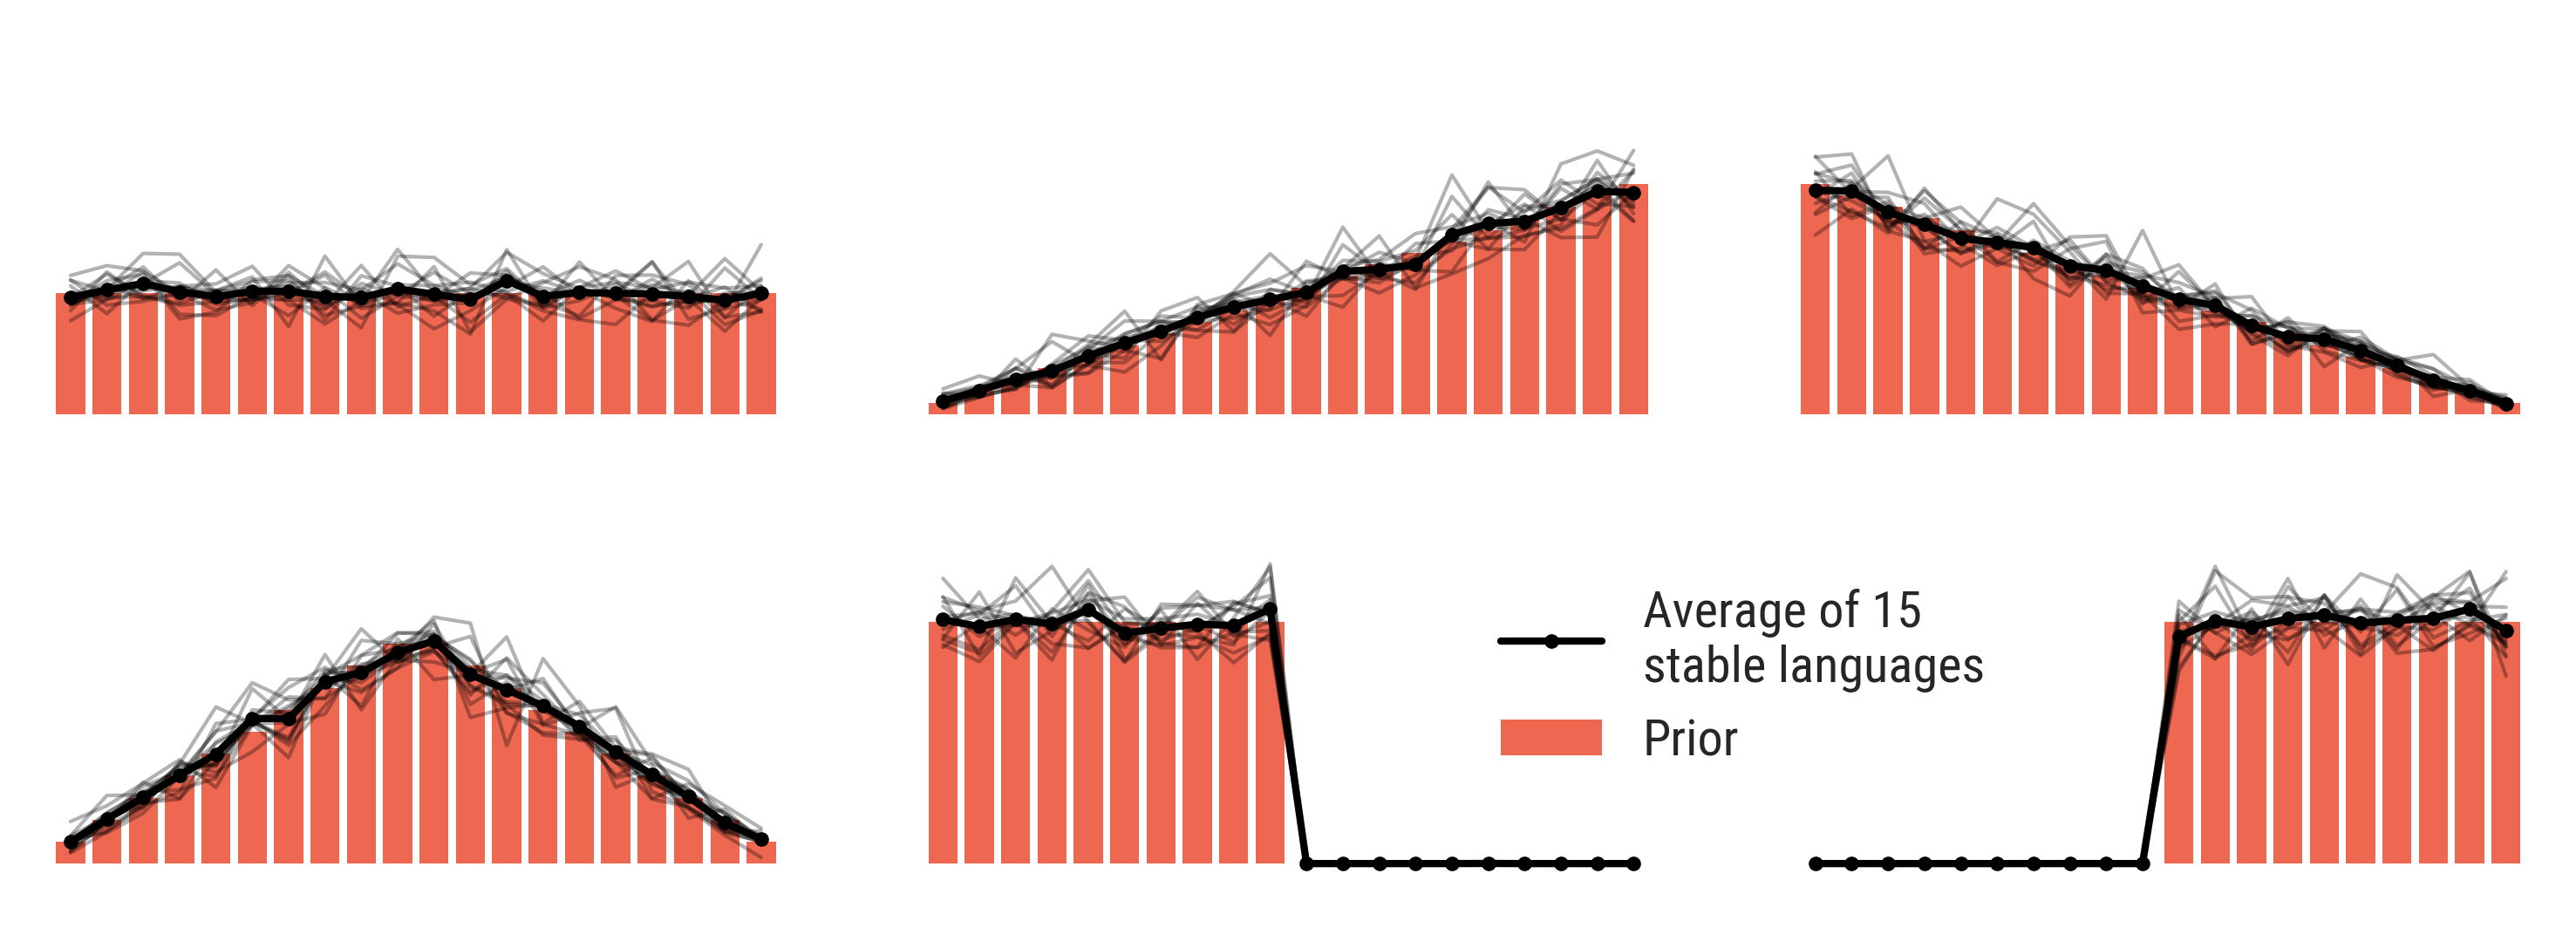

In [3]:
# plot
def show_dist(pi):
    alpha = results[pi]['params']['alpha']
    phis = results[pi]['phis']
    xs = arange(results[pi]['params']['K'])
    
    plot(xs, phis.mean(axis=1).T, 'k', lw=.5, alpha=.3)
    plot(xs, phis.mean(axis=1).mean(axis=0), 'o-k', ms=2, lw=1,
         label='Average of 15\nstable languages')
    pyplot.bar(xs, alpha/sum(alpha), label=r'Prior',
              color=get_color('orange'))

figure(figsize=cm2inch(12,4))

ax1 = subplot(231)
show_dist('flat')

ax2 = subplot(232, sharey=ax1)
show_dist('stair_up')

ax3 = subplot(233, sharey=ax1)
show_dist('stair_down')

ax4 = subplot(234, sharey=ax1)
show_dist('peak')

ax5 = subplot(235, sharey=ax1)
show_dist('lower_half')

ax6 = subplot(236, sharey=ax1)
show_dist('upper_half')

ylim(-0.005,.15)
yticks([])
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    sca(ax)
    xticks([])
    xlim(-.5, 19.5)

sns.despine(left=True,bottom=True)
legend(bbox_to_anchor=(.3, .85))

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG04-resulting-distributions.pdf', bbox_inches='tight')
copyfig('BNG04-resulting-distributions.pdf')

# Combined plot with BNG07

In [4]:
# Load all data
results7 = {}
betas = [10, 20, 500, 1000]
for beta in betas:
    results7[beta] = {'phis':[]}
    for run in range(1,16):
        fn = f'../../results/BNG07/BNG07-beta-{beta}-run-{run:0>4}'
        params = load_BNG_simulation(fn)
        if run == 1:
            results7[beta]['params'] = params
        results7[beta]['phis'].append(params['phis'])  
    results7[beta]['phis'] = array(results7[beta]['phis'])

# Beta = 100 from BNG04
beta = 100
results7[100] = {'phis':[]}
for run in range(1,16):
    fn = f'../../results/BNG04/BNG04-pi-peak-run-{run:0>4}'
    params = load_BNG_simulation(fn)
    if run == 1:
        results7[beta]['params'] = params
    results7[beta]['phis'].append(params['phis'])  
results7[beta]['phis'] = array(results7[beta]['phis'])


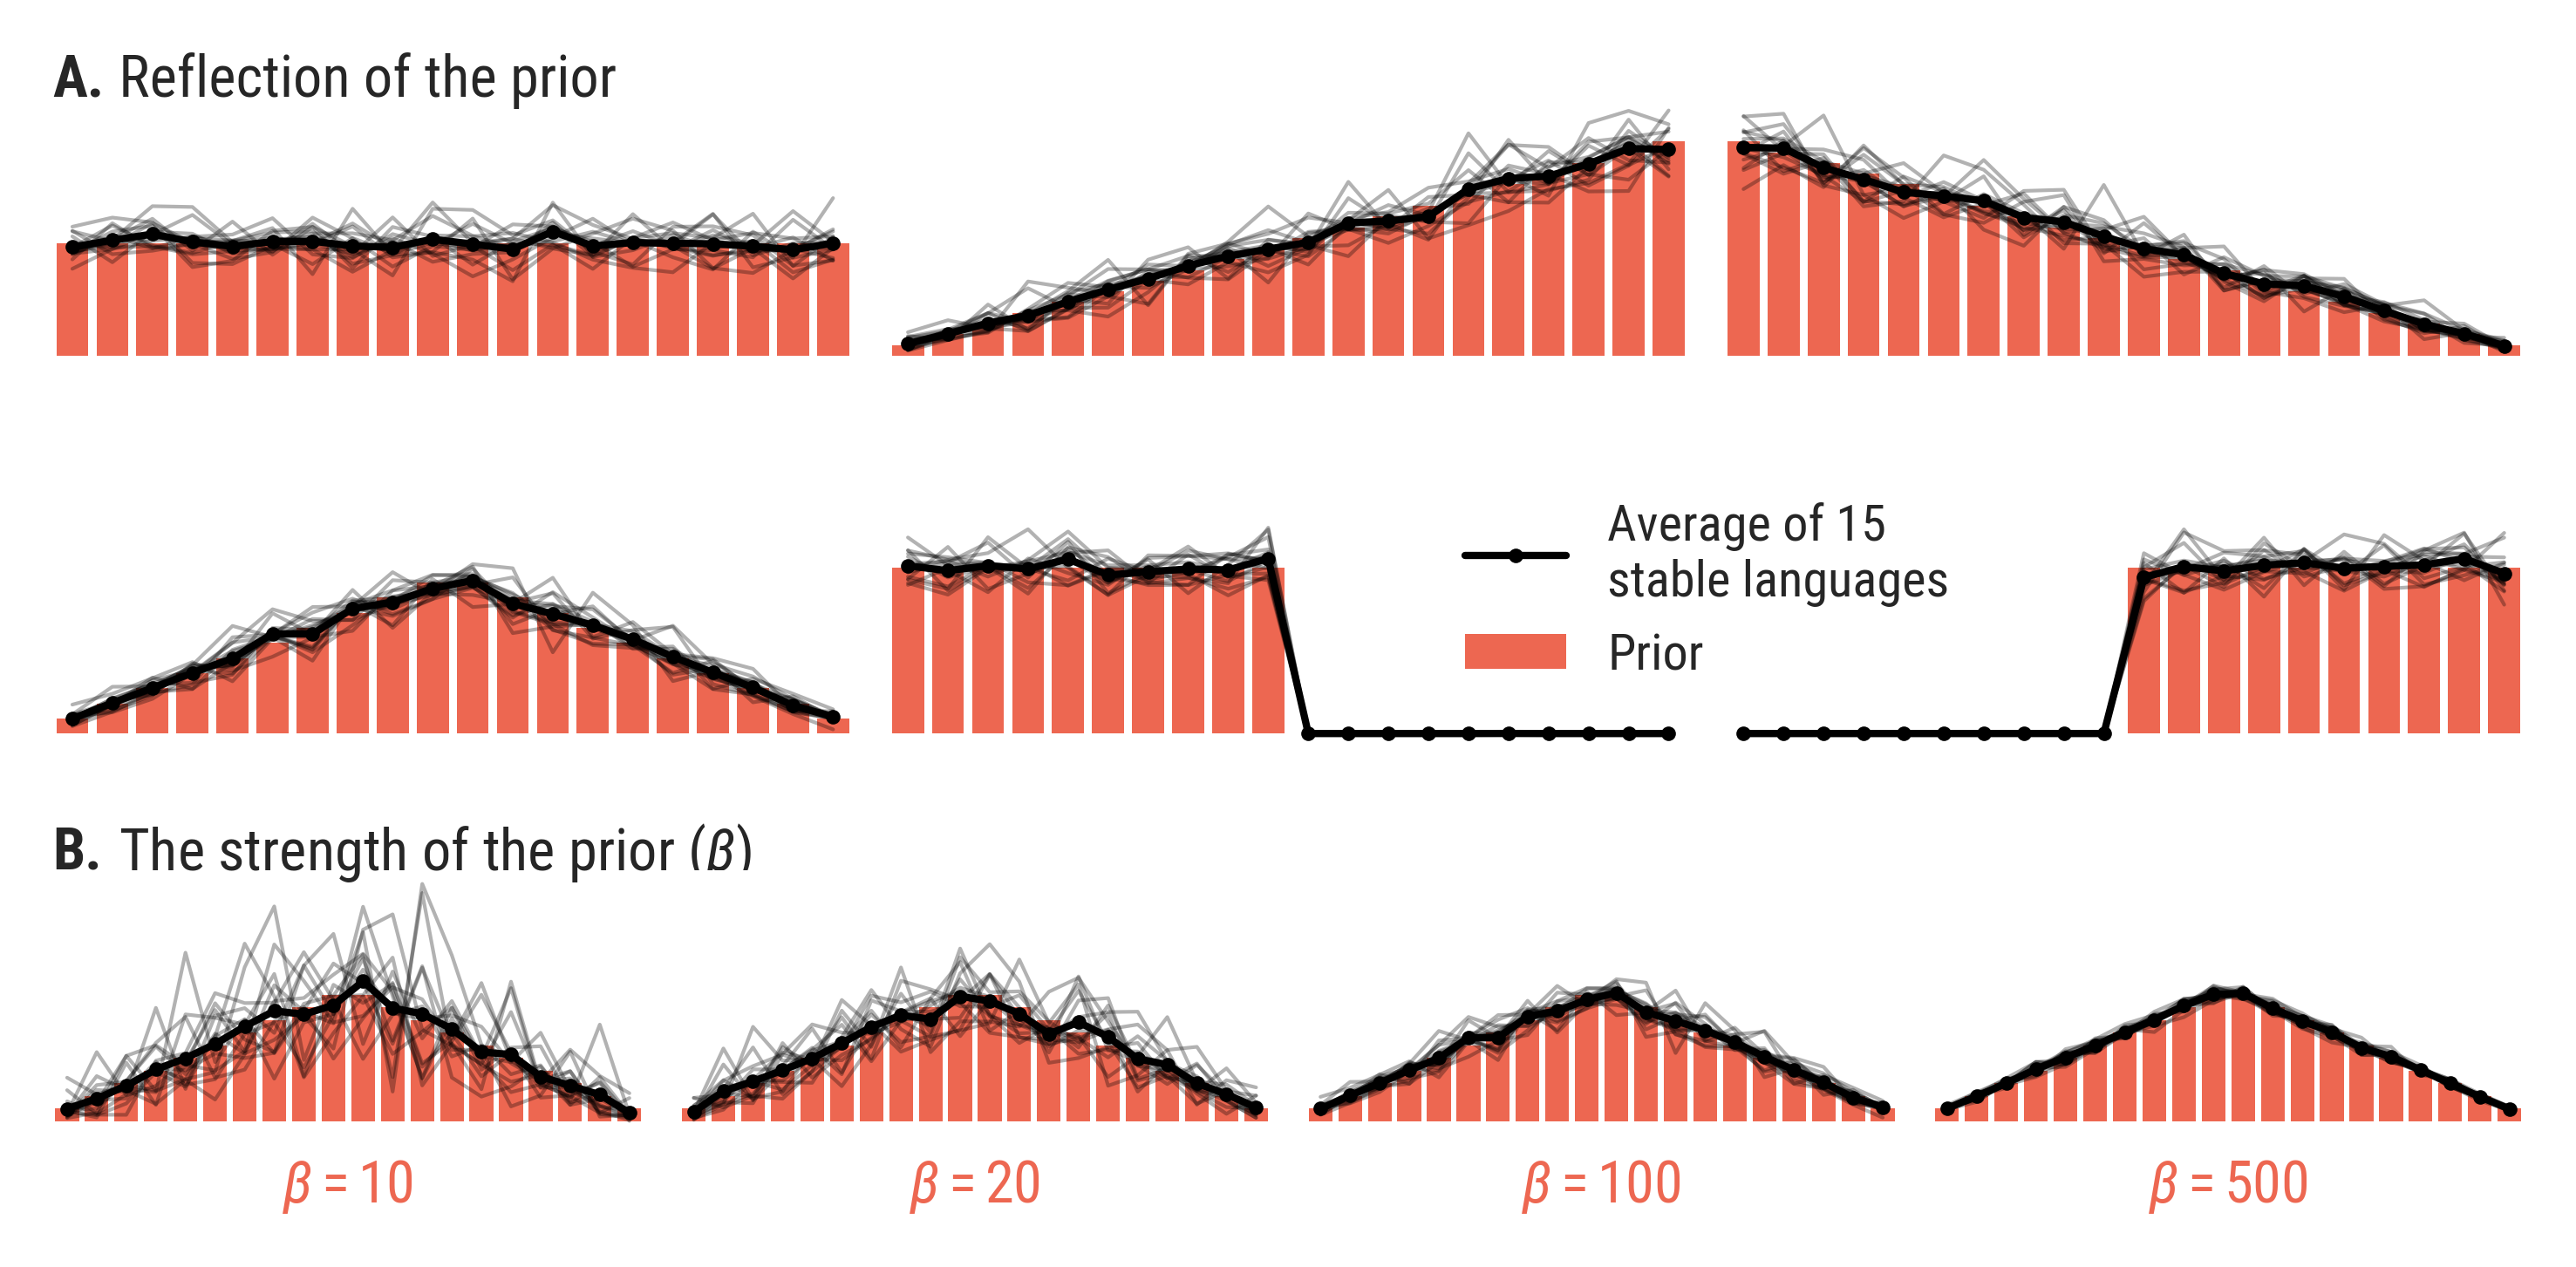

In [5]:
# plot
def show_dist(pi):
    alpha = results[pi]['params']['alpha']
    phis = results[pi]['phis']
    xs = arange(results[pi]['params']['K'])
    
    plot(xs, phis.mean(axis=1).T, 'k', lw=.5, alpha=.3)
    plot(xs, phis.mean(axis=1).mean(axis=0), 'o-k', ms=2, lw=1,
         label='Average of 15\nstable languages')
    pyplot.bar(xs, alpha/sum(alpha), label=r'Prior',
              color=get_color('orange'))

def show_dist_beta(beta):
    alpha = results7[beta]['params']['alpha']
    phis = results7[beta]['phis']
    xs = arange(results7[beta]['params']['K'])
    
    plot(xs, phis.mean(axis=1).T, 'k', lw=.5, alpha=.3)
    plot(xs, phis.mean(axis=1).mean(axis=0), 'o-k', ms=2, lw=1,
         label='Average of 15\nstable languages')
    pyplot.bar(xs, alpha/sum(alpha), label=r'Prior',
              color=get_color('orange'))
    xlabel(f'$\\beta={beta}$')
    
figure(figsize=cm2inch(12,5))
G = gridspec.GridSpec(3, 12)

# BNG05
if True:
    ax1 = subplot(G[0,:4])
    show_dist('flat')
    title('Reflection of the prior')

    ax2 = subplot(G[0,4:8], sharey=ax1)
    show_dist('stair_up')

    ax3 = subplot(G[0,8:], sharey=ax1)
    show_dist('stair_down')

    ax4 = subplot(G[1, 0:4])
    show_dist('peak')

    ax5 = subplot(G[1, 4: 8], sharey=ax4)
    show_dist('lower_half')

    ax6 = subplot(G[1, 8:], sharey=ax5)
    show_dist('upper_half')

    ylim(-0.005,.15)

# BNG07
if True:
    ax7 = subplot(G[2, :3])
    show_dist_beta(10)
    title('The strength of the prior ($\\beta$)')

    ax8 = subplot(G[2, 3:6], sharey=ax7)
    show_dist_beta(20)

    ax9 = subplot(G[2,6:9], sharey=ax8)
    show_dist_beta(100)

    ax10 = subplot(G[2, 9:], sharey=ax9)
    show_dist_beta(500)
    ylim(-0.005,.18)

# Style axes
for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]:
    sca(ax)
    xticks([])
    yticks([])
    xlim(-.5, 19.5)

sns.despine(left=True,bottom=True)
sca(ax6); legend(bbox_to_anchor=(0.32, 1.05))
restyle_title(ax1,ax7)

subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=.5)
savefig('BNG04-07-reflection-prior.pdf', bbox_inches='tight')
copyfig('BNG04-07-reflection-prior.pdf')